In [1]:
# See through the cifar-10 dataset and display some image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision

import gc

import os
import sys

from CNN_model import cnn

In [2]:
# Download CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(
    root="data", train=True, download=False, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root="data", train=False, download=False, transform=transform
)

In [3]:
len(train_dataset), len(test_dataset)  # 50000 train and 10000 test data

(50000, 10000)

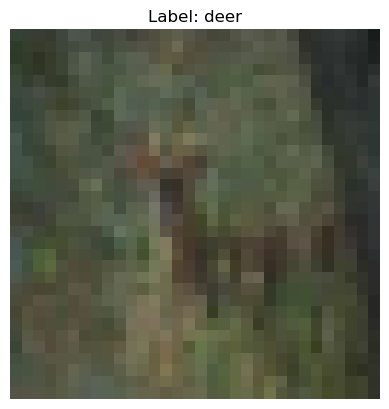

In [4]:
# Access one instance from the train_dataset
image, label = train_dataset[
    10
]  # Replace 0 with any index to view a different instance

# Convert the image tensor to a NumPy array for visualization
image = np.transpose(
    image.numpy(), (1, 2, 0)
)  # Rearrange dimensions from (C, H, W) to (H, W, C)

# CIFAR-10 class names
classes = (
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

# Display the image with its label
plt.imshow(image)
plt.title(f"Label: {classes[label]}")  # Map the label to its class name
plt.axis("off")
plt.show()

In [5]:
# Convert train and test datasets to tensors
train_images_tensor = torch.stack(
    [train_dataset[i][0] for i in range(len(train_dataset))]
)
train_labels_tensor = torch.tensor(
    [train_dataset[i][1] for i in range(len(train_dataset))]
)

test_images_tensor = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))])
test_labels_tensor = torch.tensor(
    [test_dataset[i][1] for i in range(len(test_dataset))]
)

print(f"Train images tensor shape: {train_images_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Test images tensor shape: {test_images_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_tensor.shape}")

# Convert tensors to NumPy arrays
train_images_numpy = train_images_tensor.numpy()
train_labels_numpy = train_labels_tensor.numpy()

test_images_numpy = test_images_tensor.numpy()
test_labels_numpy = test_labels_tensor.numpy()

train_images_numpy = train_images_numpy[:10]

print(f"Train images NumPy shape: {train_images_numpy.shape}")
print(f"Train labels NumPy shape: {train_labels_numpy.shape}")
print(f"Test images NumPy shape: {test_images_numpy.shape}")
print(f"Test labels NumPy shape: {test_labels_numpy.shape}")


# Clear tensors from memory
del train_images_tensor
del train_labels_tensor
del test_images_tensor
del test_labels_tensor

# Force garbage collection to free up memory
gc.collect()

Train images tensor shape: torch.Size([50000, 3, 32, 32])
Train labels tensor shape: torch.Size([50000])
Test images tensor shape: torch.Size([10000, 3, 32, 32])
Test labels tensor shape: torch.Size([10000])
Train images NumPy shape: (10, 3, 32, 32)
Train labels NumPy shape: (50000,)
Test images NumPy shape: (10000, 3, 32, 32)
Test labels NumPy shape: (10000,)


2428

In [6]:
in_channel = 3
out_channel = 3
kernel_size = 2
stride = 1
padding = 0

model = cnn(in_channel, out_channel, kernel_size, stride, padding)

In [7]:
output = model.forward(train_images_numpy)

In [8]:
output.shape

(10, 3, 31, 31)

In [9]:
output

array([[[[3.20821371e-01, 2.51273870e-01, 2.56719204e-01, ...,
          7.37749800e-01, 7.20509440e-01, 7.15327376e-01],
         [7.02509841e-02, 1.40350489e-02, 6.78056637e-02, ...,
          4.51084197e-01, 4.17717401e-01, 4.09088553e-01],
         [7.77392553e-02, 6.89050770e-02, 1.52300938e-01, ...,
          4.26357686e-01, 3.99808164e-01, 3.53160338e-01],
         ...,
         [4.41811538e-01, 1.97364068e-01, 2.11378042e-01, ...,
          6.87364926e-01, 3.30478277e-01, 9.06905661e-02],
         [5.04201365e-01, 2.49420484e-01, 2.13209293e-01, ...,
          5.70117512e-01, 3.37681991e-01, 1.56879590e-01],
         [6.30112120e-01, 4.15100594e-01, 3.27087846e-01, ...,
          7.38397205e-01, 5.98628015e-01, 3.71038855e-01]],

        [[3.92282982e-01, 2.61238904e-01, 2.54610900e-01, ...,
          8.64758906e-01, 8.38191234e-01, 8.07634274e-01],
         [1.34316516e-01, 2.18790163e-03, 6.00981405e-02, ...,
          5.67035928e-01, 5.08058758e-01, 5.12971067e-01],
        

In [10]:
output.shape

(10, 3, 31, 31)

In [11]:
dout = np.random.rand(10, 3, 31, 31)

In [ ]:
weight_gradient = model.backward(dout)